In [18]:
print("Data Science is the best")

Data Science is the best


In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('mock_data.tsv',sep='\t')
position = df["End Position(Endgame)"]
df["Auto Points Scored"] = df["Classifier Scored(Auto)"]*3 + df["Overflow Scored(Auto)"]*1 + df["Pattern Correct(Auto)"]*2
df["Teleop Points Scored"] = df["Classifier Scored(Teleop)"]*3 + df["Overflow Scored(Teleop)"]*1 + df["Depot Scored(Teleop)"]*1 + df["Pattern Correct(Teleop)"]*2
df["Endgame Points Scored"] = np.where(position == "No", 0, np.where(position == "P", 5, np.where(position == "Sc", 10, np.where(position == "Hh", 20, 0))))
df["Total Points Scored"] = df["Auto Points Scored"] + df["Teleop Points Scored"] + df["Endgame Points Scored"]
print(df)

   Scouter Initials  Match Number Robot  Team Number Starting Position  \
0               abc             1    R1         3333                R2   
1                dt             1    R2         6666                R2   
2                dt             1    B1        11111                R1   
3                fu             1    B2         4444                R2   
4                dt             2    R1         3504                R2   
5                dt             2    R2        11111                R1   
6                ty             2    B1         3333                R1   
7                hi             2    B2         4444                R1   
8                dt             3    R1         3333                R1   
9                dt             3    R2        11111                R2   
10               hi             3    B1         3333                R2   
11               pu             3    B2         4444                R2   

    No Show  Moved?  Timer  Classifie

In [20]:
df.columns

Index(['Scouter Initials', 'Match Number', 'Robot', 'Team Number',
       'Starting Position', 'No Show', 'Moved?', 'Timer',
       'Classifier Scored(Auto)', 'Overflow Scored(Auto)',
       'Pattern Correct(Auto)', 'Auto Foul', 'Pickup Location(Teleop)',
       'Classifier Scored(Teleop)', 'Overflow Scored(Teleop)',
       'Depot Scored(Teleop)', 'Pattern Correct(Teleop)',
       'Crossed Field/Played Defense?(Teleop)',
       'Was Robot Defended by Other Alliance?(Teleop)',
       'End Position(Endgame)', 'Died?(Postmatch)',
       'Tipped/Fell Over?(Postmatch)', 'Offense Skill(Postmatch)',
       'Defensive Skill(Postmatch)', 'Yellow/Red Card(Postmatch)',
       'Comments(Postmatch)', 'Auto Points Scored', 'Teleop Points Scored',
       'Endgame Points Scored', 'Total Points Scored'],
      dtype='object')

In [21]:
all_teams = [3333, 6666, 11111, 4444]
new_df = df.loc[df["Team Number"].isin(all_teams)]
print(new_df)

   Scouter Initials  Match Number Robot  Team Number Starting Position  \
0               abc             1    R1         3333                R2   
1                dt             1    R2         6666                R2   
2                dt             1    B1        11111                R1   
3                fu             1    B2         4444                R2   
5                dt             2    R2        11111                R1   
6                ty             2    B1         3333                R1   
7                hi             2    B2         4444                R1   
8                dt             3    R1         3333                R1   
9                dt             3    R2        11111                R2   
10               hi             3    B1         3333                R2   
11               pu             3    B2         4444                R2   

    No Show  Moved?  Timer  Classifier Scored(Auto)  Overflow Scored(Auto)  \
0     False    True      0       

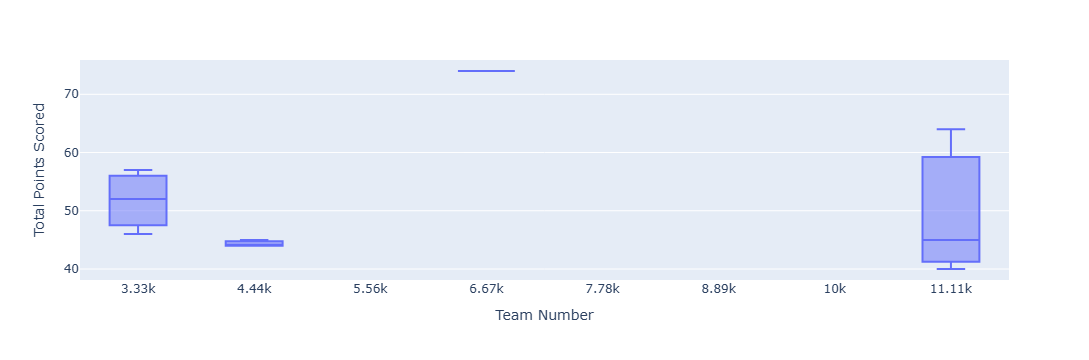

In [22]:
fig = px.box(new_df, x="Team Number", y= "Total Points Scored")
fig.show()

             Match Number  No Show    Moved?  Timer  Classifier Scored(Auto)  \
Team Number                                                                    
3333                 2.25      0.0  1.000000    0.0                 7.500000   
4444                 2.00      0.0  1.000000    0.0                 7.333333   
6666                 1.00      0.0  1.000000    0.0                10.000000   
11111                2.00      0.0  0.666667    0.0                 8.000000   

             Overflow Scored(Auto)  Pattern Correct(Auto)  Auto Foul  \
Team Number                                                            
3333                      2.250000               2.250000        0.0   
4444                      3.666667               1.666667        1.0   
6666                      0.000000               0.000000        0.0   
11111                     0.666667               1.666667        0.0   

             Pickup Location(Teleop)  Classifier Scored(Teleop)  ...  \
Team Number   

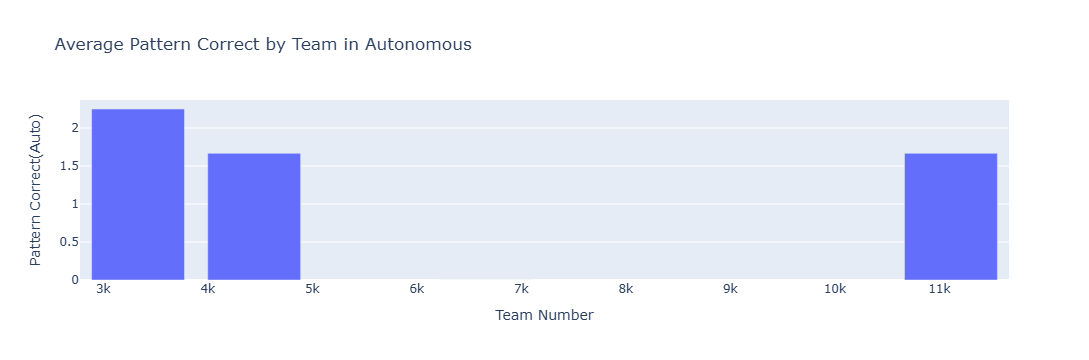

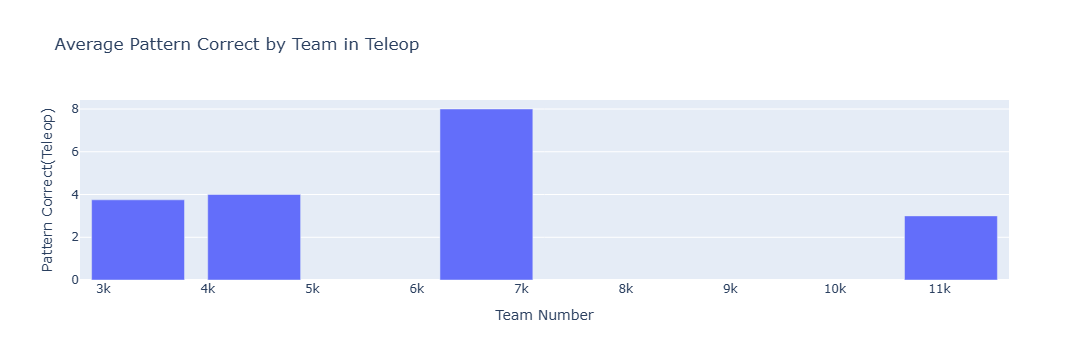

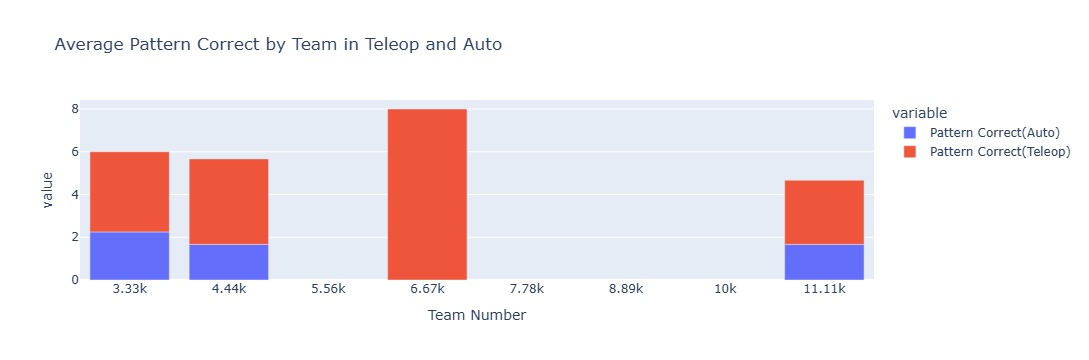

In [25]:
# Audrey's graphs :D
avg_team = new_df.groupby("Team Number").mean(numeric_only = True)
print(avg_team)

fig_auto_pattern_count = px.bar(avg_team, y = "Pattern Correct(Auto)", title = "Average Pattern Correct by Team in Autonomous")
fig_auto_pattern_count.show()

fig_teleop_pattern_count = px.bar(avg_team, y = "Pattern Correct(Teleop)", title = "Average Pattern Correct by Team in Teleop")
fig_teleop_pattern_count.show()

fig_general_pattern_count = px.bar(avg_team, y = ["Pattern Correct(Auto)", "Pattern Correct(Teleop)"], 
                                   title = "Average Pattern Correct by Team in Teleop and Auto")
fig_general_pattern_count.show()